This notebook contains the code for pre-processing the texts corresponding to interventions in the Spanish State Parliament. The pre-processing consists of:

1. Removal of \n, \t, \r.
2. Removal of punctuation.
2. Removal of digits, spaces and words with two letters or fewer.
3. Removing a list of spanish stopwords.
4. Removing procedural words: señor/a, diputado/a, señoría, President/a, etc.
5. Tokenizing.
6. Lemmatizing.

Additionally, we remove people that are not MPs and group the data by:

1. Individual & Legislature.
2. Political Group & Legislature.
3. ...

In [12]:
'''
$python -m spacy download es_core_news_sm
'''

'\n$python -m spacy download es_core_news_sm\n'

In [1]:
import pandas as pd
import nltk
from gensim.utils import tokenize
import string
from nltk.tokenize import ToktokTokenizer
import spacy

In [2]:
tok = ToktokTokenizer()

def clean(text) -> list:
    # Removing \n, \t, \r.
    text = text.replace('\t', ' ').replace('\n', ' ').replace('\r', ' ')

    # Text to lowercase.
    text = text.lower()

    # Removing punctuation.
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))

    # Double spaces.
    text = text.replace('  ', ' ')

    # Lemmatization.
    #proc = spacy.load('es_core_news_sm')

    #doc = proc(text)
    #lemmatized = [proc.lemma_ for proc in doc]

    # Tokenizing.
    tokens = tok.tokenize(text)

    # Stopwords + procedural words from the Spanish Parliament.
    stopwords = nltk.corpus.stopwords.words('spanish')

    procedural = ['diputado', 'dipuptada', 'diputados', 'diputadas', 'gobierno', 'gobiernos', 'oposición', 'exministro', 'ministro',
                'ministra', 'ministros', 'ministras', 'parlamento', 'parlamentario', 'congreso', 'pregunta',
                'preguntar', 'ley', 'leyes', 'decreto', 'decreto-ley', 'partido', 'partidos', 'grupo', 'señoras',
                'señor', 'señora', 'señores', 'señoría', 'señorías', 'senoria', 'senorias', 'voto', 'votar', 'decoro',
                'presidente', 'presidenta', 'vicepresidente', 'vicepresidenta', 'vicepresidentes', 'vicepresidentas',
                'proposición', 'proposicion', 'proposiciones', 'proyecto', 'no-ley', 'favor', 'gracias', 'enmienda',
                'enmiendas', 'moción', 'mociones', 'mocion', 'interpelación', 'interpelacion', 'interpelaciones', 'aplausos',
                'usted', 'ustedes', 'cámara'] # possible: españa, españoles, españolas, presupuesto, presupuestos, medida, medidas, política.

    other_stopwords = ['ahora', 'además', 'aquí', 'allí', 'solo', 'sino', 'hoy', 'así', 'ejemplo']

    stopwords = stopwords + procedural + other_stopwords

    # Removing stop words, procedural words, short words and numbers.
    tokens = [w for w in tokens if w not in stopwords and len(w) > 2 and w != ' ' and not w.isdigit()]

    return tokens


In [3]:
data = pd.read_csv('data/interventions/plenos-xiv.csv', index_col=0).dropna().reset_index(drop=True)
corpus = data['text'].to_list()

In [4]:
cleaned_corpus = [clean(t) for t in corpus]
data['cleaned_text'] = cleaned_corpus

In [10]:
data.head()

,legislatura,fecha,objeto_iniciativa,numero_expediente,autores,nombre_sesion,orador,enlace_pdf,text,political_group,cleaned_text
0,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Borràs Castanyer, Laura (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Presidenta, señorías, empieza el año y volvemo...",GPlu,"[empieza, año, volvemos, debate, investidura, ..."
1,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Baldoví Roda, Joan (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Moltes gràcies, senyora presidenta. Hay alguno...",GPlu,"[moltes, gràcies, senyora, encanta, olor, napa..."
2,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Quevedo Iturbe, Pedro (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Señora presidenta, señorías, señor candidato a...",GPlu,"[candidato, presidencia, buenas, tardes, todas..."
3,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Oramas González-Moro, Ana María (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Gracias, señora presidenta. Señorías, como dij...",GPlu,"[dijo, neruda, podría, escribir, versos, trist..."
4,XIV,2020-01-04,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,S.M. El Rey Don Felipe VI,Pleno,"Sabanés Nadal, Inés (GPlu)",https://www.congreso.es:443/public_oficiales/L...,"Gracias, presidenta. Señorías, a pesar de la e...",GPlu,"[pesar, exageración, pesar, sobreactuación, pe..."


In [11]:
data.to_csv('data/final/plenos-xiv-tokens.csv')

In [11]:
GP = data.loc[data['poilitical_group'] ==
              'GCUP-EC-GC']['cleaned_text'].to_list()
new = []
for l in GP:
    new.extend(l)

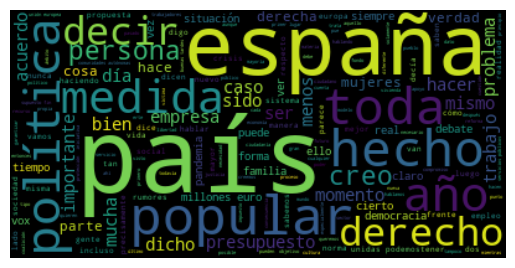

In [12]:
# Wordcloud.

# Start with loading all necessary libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(new))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Lemmatization.
proc = spacy.load('es_core_news_sm')

doc = proc(cleaned_corpus)
lemmatized = [proc.lemma_ for proc in cleaned_corpus]